In [15]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import variation, shapiro, levene
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [16]:
import os

if not os.path.exists("images"):
    os.mkdir("images")

In [17]:
# Read in csv
cols = ['Webpage', 'Page_Type', 'Institution', 'Funding', 'Tax_type', 'Region', 'Type', 'CS_Department', 'CCCS', 'Errors', 'Elements']
df = pd.read_csv('pdAnalysis.csv', usecols = cols)
df['Index'] = df.index + 1
df.head()

,Webpage,Page_Type,Institution,Funding,Tax_type,Region,Type,CS_Department,CCCS,Elements,Errors,Index
0,https://www.adams.edu/,A,Adams State University,public,non-profit,Southwest,University,yes,no,698,1,1
1,https://www.adams.edu/academics/,C,Adams State University,public,non-profit,Southwest,University,yes,no,729,1,2
2,https://www.adams.edu/academics/graduate/couns...,D,Adams State University,public,non-profit,Southwest,University,yes,no,507,1,3
3,https://www.adams.edu/catalog/,C,Adams State University,public,non-profit,Southwest,University,yes,no,512,1,4
4,https://www.adams.edu/faculty-staff/,C,Adams State University,public,non-profit,Southwest,University,yes,no,645,1,5


In [18]:
# Add normalization 
# TODO: Rename to FR
df['FR'] = df['Errors']/df['Elements']
df.head()

,Webpage,Page_Type,Institution,Funding,Tax_type,Region,Type,CS_Department,CCCS,Elements,Errors,Index,FR
0,https://www.adams.edu/,A,Adams State University,public,non-profit,Southwest,University,yes,no,698,1,1,0.001433
1,https://www.adams.edu/academics/,C,Adams State University,public,non-profit,Southwest,University,yes,no,729,1,2,0.001372
2,https://www.adams.edu/academics/graduate/couns...,D,Adams State University,public,non-profit,Southwest,University,yes,no,507,1,3,0.001972
3,https://www.adams.edu/catalog/,C,Adams State University,public,non-profit,Southwest,University,yes,no,512,1,4,0.001953
4,https://www.adams.edu/faculty-staff/,C,Adams State University,public,non-profit,Southwest,University,yes,no,645,1,5,0.001550


In [19]:
'''
Box Cox transformation from
https://www.geeksforgeeks.org/box-cox-transformation-using-python/
'''

'\nBox Cox transformation from\nhttps://www.geeksforgeeks.org/box-cox-transformation-using-python/\n'

In [20]:
fr_list = df['FR'].dropna().tolist()
fr_list = list(map(lambda num: num + 0.0000000000000001, fr_list))

Lambda value used for Transformation: 0.2401654407311067


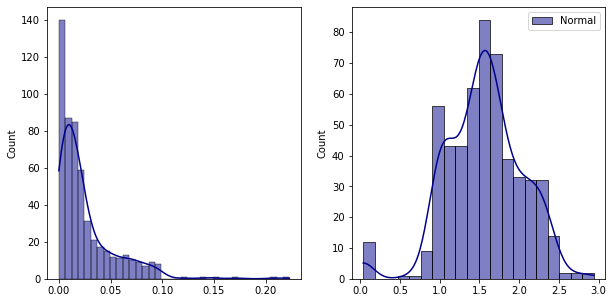

In [21]:
# transform data & save lambda value
fr_fitted, fr_lambda = stats.boxcox(fr_list)

fr_fitted = fr_fitted  + 4.2

# creating axes to draw plots
fig, ax = plt.subplots(1, 2)
 
# plotting the original data(non-normal) and
# fitted data (normal)
sns.histplot(fr_list, kde = True, label = "Non-Normal", color ="darkblue", ax = ax[0])
 
sns.histplot(fr_fitted, kde = True, label = "Normal", color ="darkblue", ax = ax[1])
 
# adding legends to the subplots
plt.legend(loc = "upper right")
 
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)

plt.savefig('images/boxCox.png')

print(f"Lambda value used for Transformation: {fr_lambda}")

In [22]:
df['Errors'].skew()

5.902908743497808

In [23]:
df['Elements'].skew()

7.628872782871994

In [24]:
df['FR'].skew()

2.452055590750207

In [25]:
df['FR_fitted'] = fr_fitted
df['FR_fitted'].skew()

-0.3419722509800692

In [36]:
df['Elements'].kurtosis()

86.64280885682646

In [26]:
df['FR'].kurtosis()

9.217572399694166

In [27]:
df['FR_fitted'].kurtosis()

0.9463383076500773

In [28]:
# Shapiro-Wilk's test for normality
shapiro(df['FR_fitted'])

ShapiroResult(statistic=0.9723489284515381, pvalue=1.4536863268688194e-08)

In [29]:
# Levene's test for homoscedascity (likely spelled wrong)
gb = df.groupby(['Institution'])['FR_fitted'].apply(np.array)
levene(gb[0], gb[1], gb[2], gb[3], gb[4], gb[5], gb[6], gb[7], gb[8], gb[9], 
         gb[10], gb[11], gb[12], gb[13], gb[14], gb[15], gb[16], gb[17], gb[18], gb[19], 
         gb[20], gb[21], gb[22], gb[23], gb[24], gb[25], gb[26], gb[27], gb[28], gb[29], 
         gb[30], gb[31], gb[32], gb[33], gb[34], gb[35], gb[36], gb[37], gb[38], gb[39], 
         gb[40], gb[41], gb[42], gb[43], gb[44], gb[45], gb[46], gb[47], gb[48], gb[49], 
         gb[50], gb[51], gb[52], gb[53])

LeveneResult(statistic=2.9089319510674727, pvalue=7.007994957374173e-10)

In [30]:
import statsmodels.graphics.gofplots as sm


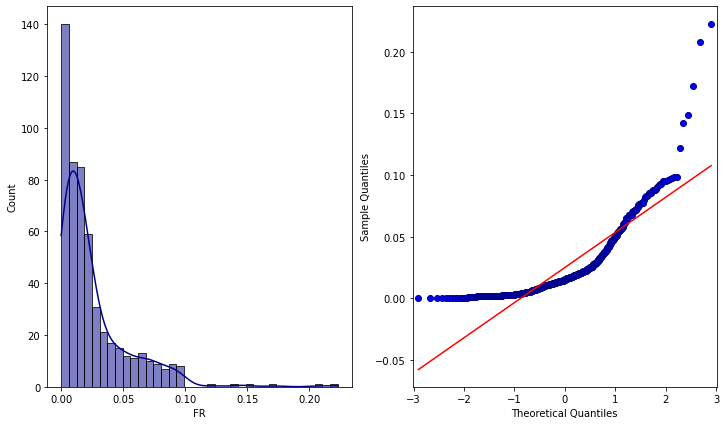

In [31]:
# I probably want to save these as two separate images
fig, ax = plt.subplots(1, 2, figsize=(12, 7))
sns.histplot(df['FR'],kde=True, color ='darkblue',ax=ax[0])
sm.ProbPlot(df['FR']).qqplot(line='s', color='darkblue',  ax=ax[1])
plt.savefig('images/probplotFR.png')

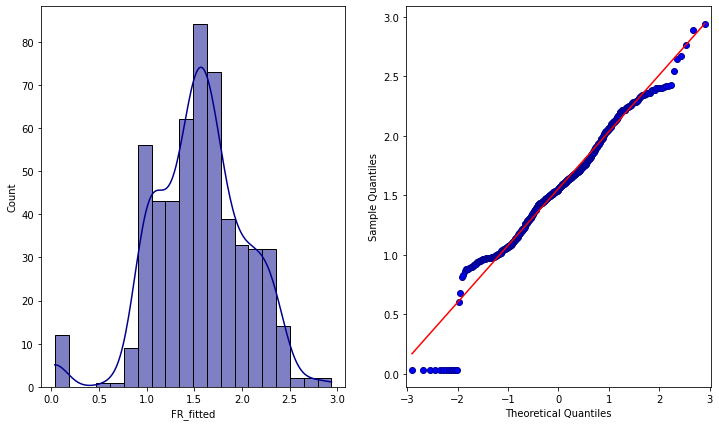

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(12, 7))
sm.ProbPlot(df['FR_fitted']).qqplot(line='s', color='darkblue', ax=ax[1]);
sns.histplot(df['FR_fitted'],kde=True, color ='darkblue',ax=ax[0])

plt.savefig('images/probplotFRFitted.png')

<AxesSubplot:xlabel='FR_fitted', ylabel='Count'>

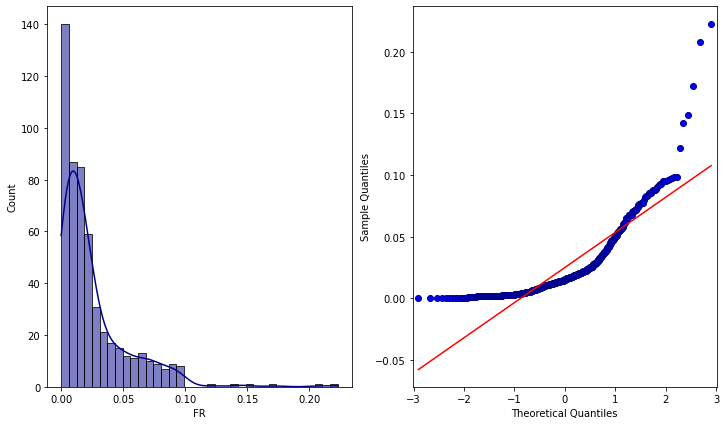

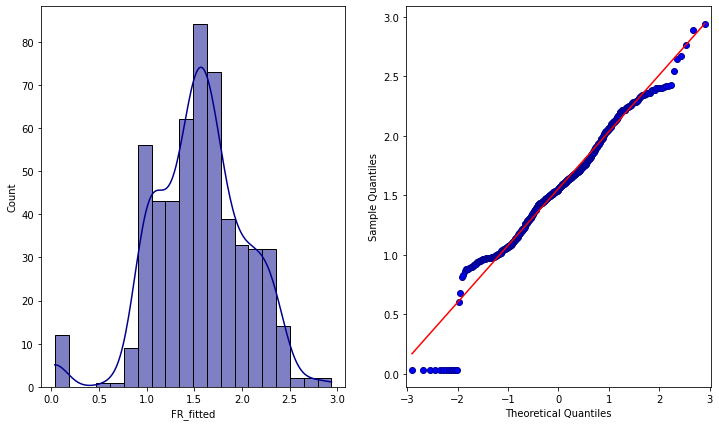

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(12, 7))
sns.histplot(df['FR'],kde=True, color ='darkblue',ax=ax[0])
sm.ProbPlot(df['FR']).qqplot(line='s', color='darkblue', ax=ax[1])

fig, ax = plt.subplots(1, 2, figsize=(12, 7))
sm.ProbPlot(df['FR_fitted']).qqplot(line='s', color='darkblue', ax=ax[1]);
sns.histplot(df['FR_fitted'],kde=True, color ='darkblue',ax=ax[0])

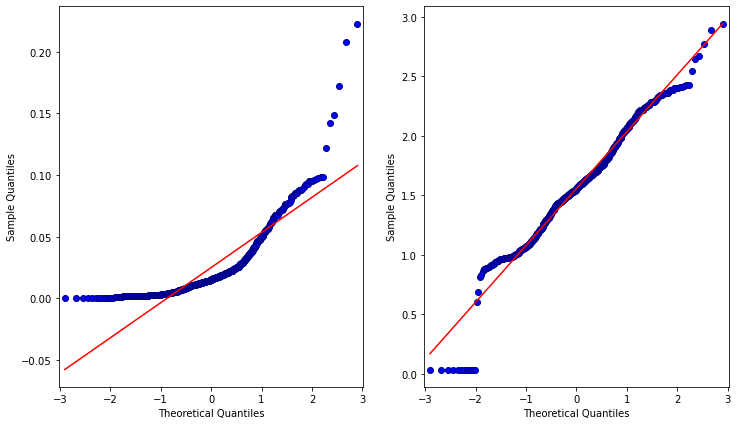

In [34]:
# I probably want to save these as two separate images
fig, ax = plt.subplots(1, 2, figsize=(12, 7))
sm.ProbPlot(df['FR']).qqplot(line='s', color='darkblue', ax=ax[0])
sm.ProbPlot(df['FR_fitted']).qqplot(line='s', color='darkblue', ax=ax[1])
plt.savefig('images/probplotboth.png')

In [35]:
#df.to_csv('fittedFailureRate.csv')